# **Assignment-2**

# **Convolution Neural Networks(CNN)**

**Downloading the data**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivaniharidaspitla","key":"d26413613bc678ed93aac1e4a4159433"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats
     

 99% 805M/812M [00:04<00:00, 261MB/s]
100% 812M/812M [00:04<00:00, 201MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip

In [5]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [6]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# **Training the convent network from scratch**

**Model 1:Training sample of 1000, a validation sample of 500, and a test sample of 500**

In [7]:
make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=2000)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers


**Instantiating a small convnet for dogs vs. cats classification**

In [9]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [11]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Data preprocessing**

**Using image_dataset_from_directory to read images**

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [13]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [14]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [15]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [16]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the Dataset**

In [17]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a Dataset**

In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 18s 92ms/step - loss: 0.7152 - accuracy: 0.5080 - val_loss: 0.6911 - val_accuracy: 0.5290
Epoch 2/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6907 - accuracy: 0.5390 - val_loss: 0.6917 - val_accuracy: 0.5080
Epoch 3/30
63/63 [==============================] - 5s 81ms/step - loss: 0.6794 - accuracy: 0.5600 - val_loss: 0.6871 - val_accuracy: 0.5390
Epoch 4/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6538 - accuracy: 0.6345 - val_loss: 0.6359 - val_accuracy: 0.6320
Epoch 5/30
63/63 [==============================] - 4s 66ms/step - loss: 0.6269 - accuracy: 0.6595 - val_loss: 0.6278 - val_accuracy: 0.6420
Epoch 6/30
63/63 [==============================] - 5s 81ms/step - loss: 0.5884 - accuracy: 0.6785 - val_loss: 0.8144 - val_accuracy: 0.6110
Epoch 7/30
63/63 [==============================] - 4s 63ms/step - loss: 0.5693 - accuracy: 0.7020 - val_loss: 0.6198 - val_accuracy: 0.6760
Epoch 8/30
6

**Displaying curves of loss and accuracy during training**

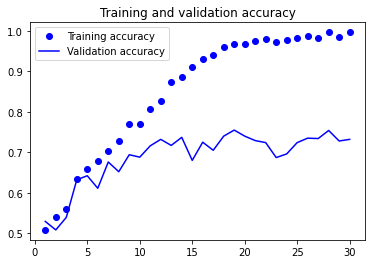

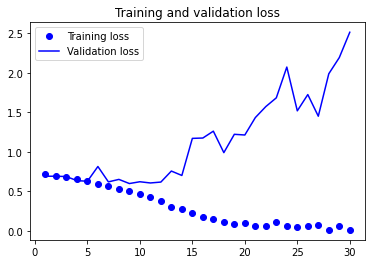

In [19]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [20]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 33ms/step - loss: 0.5728 - accuracy: 0.7170
Test accuracy: 0.717


Since the validation and the tes accuracy of the model is very low that is 71%

To improve performance in developing a network that we trained from scratch, we will train our model on following techniques.

**Model 1a: Using Data Augmentation**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [22]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30


63/63 [==============================] - 19s 219ms/step - loss: 0.7089 - accuracy: 0.5055 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 14s 214ms/step - loss: 0.6932 - accuracy: 0.5150 - val_loss: 0.6907 - val_accuracy: 0.5590
Epoch 3/30
63/63 [==============================] - 14s 212ms/step - loss: 0.6878 - accuracy: 0.5520 - val_loss: 0.7213 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 14s 212ms/step - loss: 0.6858 - accuracy: 0.5675 - val_loss: 0.6351 - val_accuracy: 0.6220
Epoch 5/30
63/63 [==============================] - 14s 214ms/step - loss: 0.6584 - accuracy: 0.6165 - val_loss: 0.7614 - val_accuracy: 0.5520
Epoch 6/30
63/63 [==============================] - 14s 214ms/step - loss: 0.6434 - accuracy: 0.6435 - val_loss: 0.6106 - val_accuracy: 0.6890
Epoch 7/30
63/63 [==============================] - 14s 213ms/step - loss: 0.6174 - accuracy: 0.6575 - val_loss: 0.6309 - val_accuracy: 0.6480
Epoch 8/30

In [24]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 44ms/step - loss: 0.4594 - accuracy: 0.7890
Test accuracy: 0.789


**Defining a data augmentation stage to add to an image model**

In [25]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

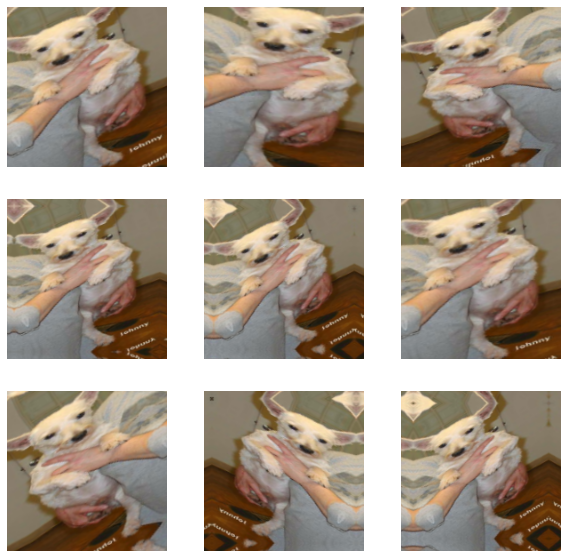

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Model 1b: Using Dropout Method**

In [27]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 65ms/step - loss: 0.6981 - accuracy: 0.5045 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 84ms/step - loss: 0.6915 - accuracy: 0.5495 - val_loss: 0.6933 - val_accuracy: 0.5290
Epoch 3/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6799 - accuracy: 0.6100 - val_loss: 0.8090 - val_accuracy: 0.5220
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6453 - accuracy: 0.6330 - val_loss: 0.6566 - val_accuracy: 0.6120
Epoch 5/30
63/63 [==============================] - 5s 83ms/step - loss: 0.6183 - accuracy: 0.6550 - val_loss: 0.6289 - val_accuracy: 0.6480
Epoch 6/30
63/63 [==============================] - 4s 65ms/step - loss: 0.5915 - accuracy: 0.6760 - val_loss: 0.6801 - val_accuracy: 0.6630
Epoch 7/30
63/63 [==============================] - 6s 87ms/step - loss: 0.5692 - accuracy: 0.7025 - val_loss: 0.5801 - val_accuracy: 0.7050
Epoch 8/30
63

In [29]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 0.5216 - accuracy: 0.7480
Test accuracy: 0.748


**Model 1c: Using both Image Augmentation and Dropout mthod**

In [30]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [31]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 217ms/step - loss: 0.7002 - accuracy: 0.4960 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 14s 216ms/step - loss: 0.6932 - accuracy: 0.5215 - val_loss: 0.6922 - val_accuracy: 0.5030
Epoch 3/30
63/63 [==============================] - 14s 215ms/step - loss: 0.7034 - accuracy: 0.5220 - val_loss: 0.6814 - val_accuracy: 0.5950
Epoch 4/30
63/63 [==============================] - 14s 215ms/step - loss: 0.6843 - accuracy: 0.5845 - val_loss: 0.6849 - val_accuracy: 0.5320
Epoch 5/30
63/63 [==============================] - 15s 228ms/step - loss: 0.6636 - accuracy: 0.6070 - val_loss: 0.6477 - val_accuracy: 0.6330
Epoch 6/30
63/63 [==============================] - 14s 219ms/step - loss: 0.6432 - accuracy: 0.6295 - val_loss: 0.6227 - val_accuracy: 0.6370
Epoch 7/30
63/63 [==============================] - 15s 238ms/step - loss: 0.6384 - accuracy: 0.6455 - val_loss: 0.8693 - val_accuracy: 0.5460

In [34]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.4305 - accuracy: 0.8160
Test accuracy: 0.816


after training the model using the above three techniques we can see that the model trained using both data augmentation and drop out method gave relatively improved accuracy, hence we will be using this technique .

As we know Training with more data helps to increase accoracy of mode as it avoids the overfitting problem. We will be increasing the training sample size further.

**Model 2) Increasing the Training sample size to 5000.Including Maxpooling,Data Augmentation and Dropout technique with dropout rate of 0.5**

In [35]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_1", start_index=0, end_index=5000)
make_subset("validation_1", start_index=5000, end_index=5500)
make_subset("test_1", start_index=5500, end_index=6000)

train_dataset_1 = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_1 = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset_1 = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Defining a new convnet that includes image augmentation and dropout**

In [36]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

# used early stopping to stop optimization when it isn't helping any more. 
early_stopping_monitor = EarlyStopping(patience=10)

In [40]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


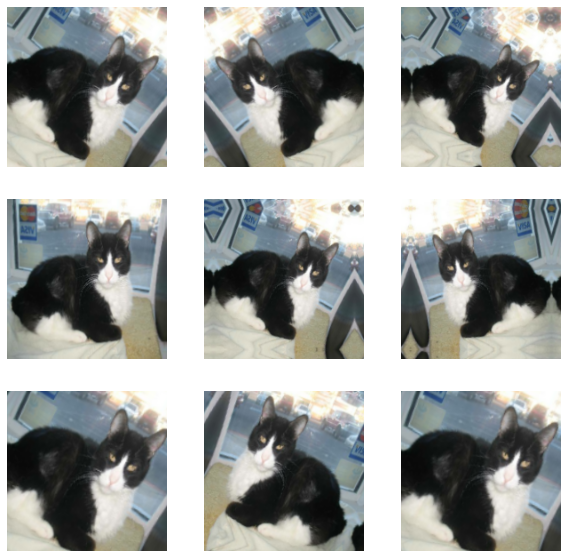

In [41]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [44]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_1,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 20s 58ms/step - loss: 0.8049 - accuracy: 0.5235 - val_loss: 0.6915 - val_accuracy: 0.5340
Epoch 2/30
313/313 [==============================] - 17s 54ms/step - loss: 0.6501 - accuracy: 0.6286 - val_loss: 0.6132 - val_accuracy: 0.6600
Epoch 3/30
313/313 [==============================] - 18s 58ms/step - loss: 0.6140 - accuracy: 0.6731 - val_loss: 0.6210 - val_accuracy: 0.6470
Epoch 4/30
313/313 [==============================] - 17s 54ms/step - loss: 0.5880 - accuracy: 0.6949 - val_loss: 0.5646 - val_accuracy: 0.7090
Epoch 5/30
313/313 [==============================] - 19s 58ms/step - loss: 0.5556 - accuracy: 0.7257 - val_loss: 0.5388 - val_accuracy: 0.7320
Epoch 6/30
313/313 [==============================] - 19s 58ms/step - loss: 0.5226 - accuracy: 0.7526 - val_loss: 0.4864 - val_accuracy: 0.7700
Epoch 7/30
313/313 [==============================] - 19s 58ms/step - loss: 0.4863 - accuracy: 0.7780 - val_loss: 0.5548 - val_accuracy:

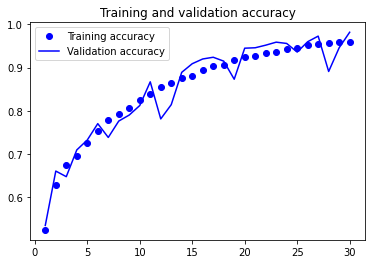

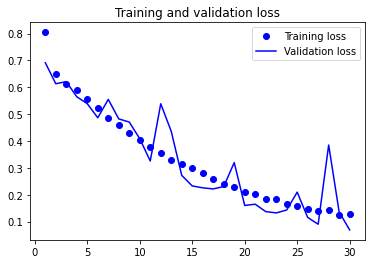

In [45]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [47]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 34ms/step - loss: 0.4032 - accuracy: 0.8720
Test accuracy: 0.872


**Model 3: Increasing the Training sample size to 10000**

In [50]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_4", start_index=0, end_index=10000)
make_subset("validation_4", start_index=10000, end_index=10500)
make_subset("test_4", start_index=10500, end_index=11000)

train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_4",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32)
test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_4",
    image_size=(180, 180),
    batch_size=32)

Found 20000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [51]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [52]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


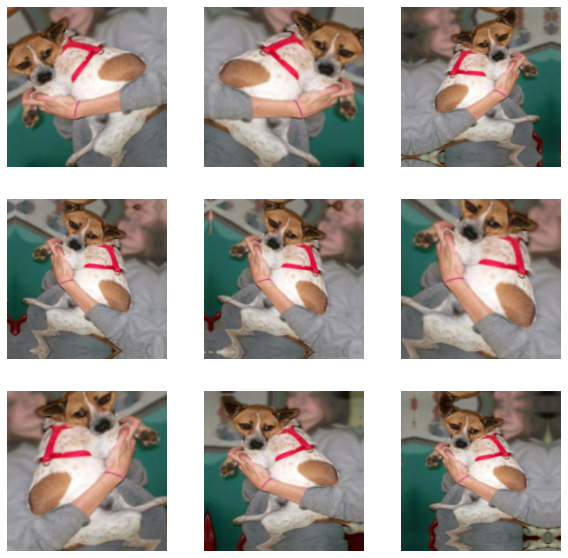

In [53]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [54]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 35s 54ms/step - loss: 0.6276 - accuracy: 0.6376 - val_loss: 0.6126 - val_accuracy: 0.6810
Epoch 2/30
625/625 [==============================] - 34s 54ms/step - loss: 0.4770 - accuracy: 0.7745 - val_loss: 0.4055 - val_accuracy: 0.8100
Epoch 3/30
625/625 [==============================] - 33s 52ms/step - loss: 0.3874 - accuracy: 0.8289 - val_loss: 0.3192 - val_accuracy: 0.8550
Epoch 4/30
625/625 [==============================] - 35s 55ms/step - loss: 0.3165 - accuracy: 0.8637 - val_loss: 0.3321 - val_accuracy: 0.8690
Epoch 5/30
625/625 [==============================] - 35s 56ms/step - loss: 0.2581 - accuracy: 0.8917 - val_loss: 0.2792 - val_accuracy: 0.8800
Epoch 6/30
625/625 [==============================] - 33s 53ms/step - loss: 0.2160 - accuracy: 0.9125 - val_loss: 0.2615 - val_accuracy: 0.8900
Epoch 7/30
625/625 [==============================] - 34s 55ms/step - loss: 0.1904 - accuracy: 0.9224 - val_loss: 0.2062 - val_accuracy:

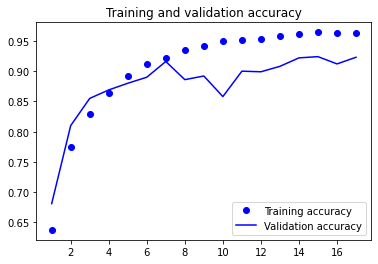

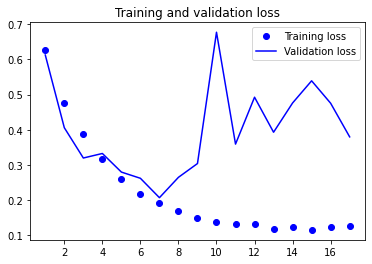

In [55]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [58]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 33ms/step - loss: 0.2719 - accuracy: 0.9000
Test accuracy: 0.900


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

**Pre-Trained Model - 1000 Training samples**

In [59]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [60]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [61]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [62]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Adding a data augmentation stage and a classifier to the convolutional base**

In [63]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [64]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [65]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


63/63 [==============================] - 29s 332ms/step - loss: 4.0023 - accuracy: 0.7095 - val_loss: 0.9360 - val_accuracy: 0.9150
Epoch 2/30
63/63 [==============================] - 19s 296ms/step - loss: 1.2520 - accuracy: 0.8605 - val_loss: 0.5456 - val_accuracy: 0.9440
Epoch 3/30
63/63 [==============================] - 20s 311ms/step - loss: 0.6101 - accuracy: 0.9100 - val_loss: 0.4020 - val_accuracy: 0.9440
Epoch 4/30
63/63 [==============================] - 19s 298ms/step - loss: 0.3888 - accuracy: 0.9240 - val_loss: 0.3750 - val_accuracy: 0.9620
Epoch 5/30
63/63 [==============================] - 19s 299ms/step - loss: 0.2821 - accuracy: 0.9470 - val_loss: 0.3705 - val_accuracy: 0.9630
Epoch 6/30
63/63 [==============================] - 21s 330ms/step - loss: 0.2480 - accuracy: 0.9495 - val_loss: 0.3867 - val_accuracy: 0.9650
Epoch 7/30
63/63 [==============================] - 19s 296ms/step - loss: 0.1645 - accuracy: 0.9600 - val_loss: 0.3419 - val_accuracy: 0.9660
Epoch 8/30

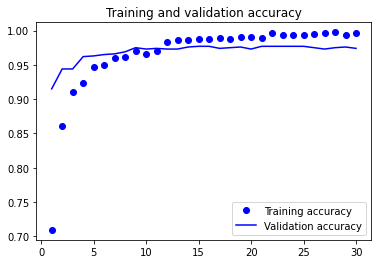

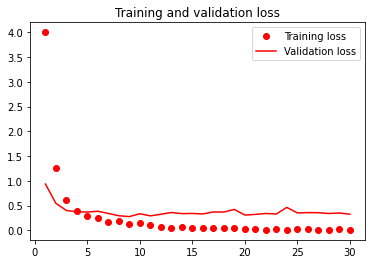

In [67]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [68]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 87ms/step - loss: 0.2691 - accuracy: 0.9700
Test accuracy: 0.970


**Pre-Trained Model - 5000 Training samples**

In [69]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [70]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [71]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [72]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [73]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_1,
    epochs=10,
    validation_data=validation_dataset_1,
    callbacks=callbacks)

Epoch 1/10


313/313 [==============================] - 88s 262ms/step - loss: 1.4022 - accuracy: 0.8723 - val_loss: 0.2099 - val_accuracy: 0.9600
Epoch 2/10
313/313 [==============================] - 84s 267ms/step - loss: 0.2411 - accuracy: 0.9346 - val_loss: 0.0970 - val_accuracy: 0.9710
Epoch 3/10
313/313 [==============================] - 82s 261ms/step - loss: 0.1572 - accuracy: 0.9493 - val_loss: 0.0996 - val_accuracy: 0.9750
Epoch 4/10
313/313 [==============================] - 83s 263ms/step - loss: 0.1106 - accuracy: 0.9616 - val_loss: 0.1108 - val_accuracy: 0.9790
Epoch 5/10
313/313 [==============================] - 82s 262ms/step - loss: 0.0831 - accuracy: 0.9734 - val_loss: 0.0862 - val_accuracy: 0.9790
Epoch 6/10
313/313 [==============================] - 82s 261ms/step - loss: 0.0889 - accuracy: 0.9748 - val_loss: 0.1093 - val_accuracy: 0.9760
Epoch 7/10
313/313 [==============================] - 83s 265ms/step - loss: 0.0798 - accuracy: 0.9753 - val_loss: 0.1090 - val_accuracy: 0.9

In [75]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 95ms/step - loss: 0.1011 - accuracy: 0.9730
Test accuracy: 0.973


**Pre-Trained Model - 10000 samples**

In [76]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [77]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [78]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [79]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [81]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 167s 266ms/step - loss: 0.0870 - accuracy: 0.9694 - val_loss: 0.1417 - val_accuracy: 0.9750
Epoch 2/10
625/625 [==============================] - 165s 264ms/step - loss: 0.0785 - accuracy: 0.9750 - val_loss: 0.1560 - val_accuracy: 0.9770
Epoch 3/10
625/625 [==============================] - 168s 268ms/step - loss: 0.0723 - accuracy: 0.9775 - val_loss: 0.1566 - val_accuracy: 0.9820
Epoch 4/10
625/625 [==============================] - 165s 263ms/step - loss: 0.0625 - accuracy: 0.9802 - val_loss: 0.2054 - val_accuracy: 0.9820
Epoch 5/10
625/625 [==============================] - 165s 264ms/step - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.2297 - val_accuracy: 0.9800
Epoch 6/10
625/625 [==============================] - 166s 265ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.1788 - val_accuracy: 0.9780
Epoch 7/10
625/625 [==============================] - 165s 264ms/step - loss: 0.0561 - accuracy: 0.9839 - val_loss: 0.2302 -

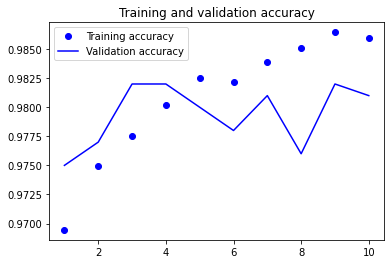

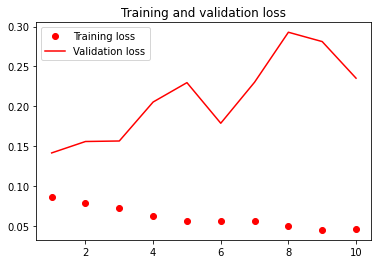

In [82]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [85]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 98ms/step - loss: 0.0761 - accuracy: 0.9850
Test accuracy: 0.985


**Summary**

1.The Model 1 that is the unregularized Model of Cats and Dogs example with training sample of 1000, validation sample of 500 and test sample of 500 gives very low accuracy that is 71%. This represents Overfitting as the training size is small.

2.By using different techniques, we can optimize the performance of the model kepp the sample size the same that is 1000.
For this I have used three techniques on the model those are
a) Drop out Method

b) Data Augmentation

c) Data Augmentation and drop out method.

3.It was observed that the model trained using data augmentation and dropout method gave improved accuracy.





4.Train with more data: As training with more data helps to increase the accuracy. We tried to increase the training samples to 5000 and 10000 gave improved accuracy.

5.Here when the models are pretrained the accuracy was improved upto almost 99%.